# Нормализация гистограмм спутниковых снимков

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch import nn
from torchvision import transforms

from torch.utils.data import DataLoader, Dataset
from PIL import Image

from diffusers import DDPMScheduler, UNet2DModel

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


Объявим функцию для нормализации, применим ее к загруженным изображениям

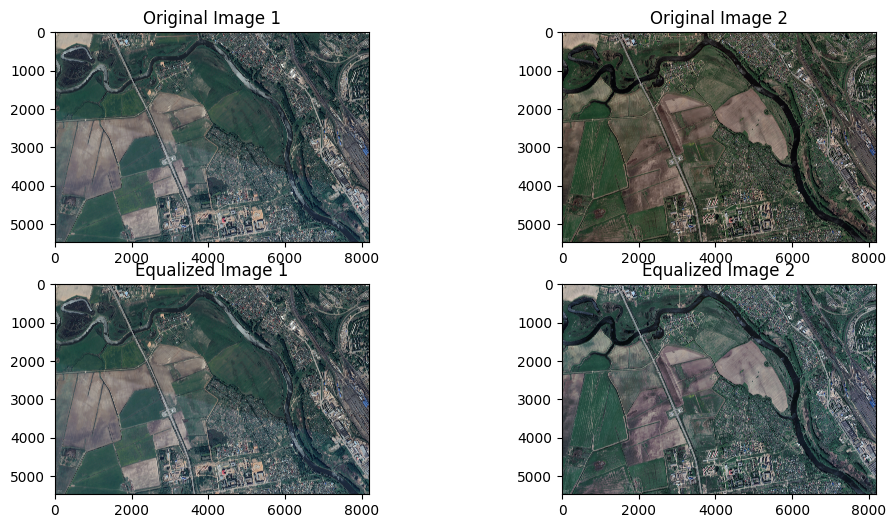

In [3]:
def match_histograms(image1, image2):
    result_image = np.zeros_like(image2)

    for i in range(3):  # Проход по каждому каналу RGB
        hist1 = cv2.calcHist([image1], [i], None, [256], [0, 256])
        hist2 = cv2.calcHist([image2], [i], None, [256], [0, 256])

        cdf1 = hist1.cumsum()
        cdf1 = (cdf1 / cdf1[-1]) * 255

        cdf2 = hist2.cumsum()
        cdf2 = (cdf2 / cdf2[-1]) * 255

        lut = np.interp(cdf2, cdf1, range(256)).astype(np.uint8)
        result_image[:,:,i] = cv2.LUT(image2[:,:,i], lut)

    return image1, result_image


image1 = cv2.imread('1_5_2014.jpg')
image2 = cv2.imread('1_5_2020.jpg')

result_image1, result_image2 = match_histograms(image1, image2)

plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(222)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(223)
plt.imshow(cv2.cvtColor(result_image1, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image 1')

plt.subplot(224)
plt.imshow(cv2.cvtColor(result_image2, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image 2')

plt.show()

Взглянем на исходные гистограммы

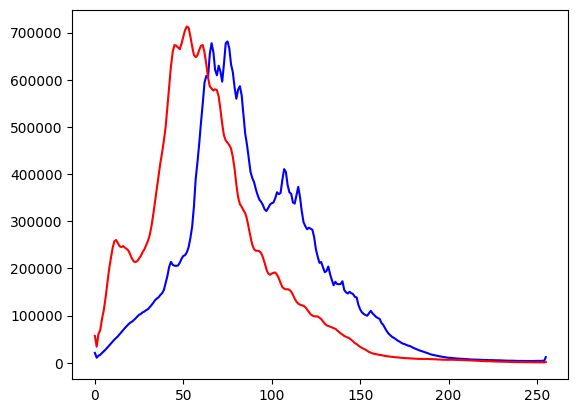

In [4]:
hist1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

plt.plot(hist1, color='b')
plt.plot(hist2, color='r')
plt.show()

Взглянем на полученные гистограммы

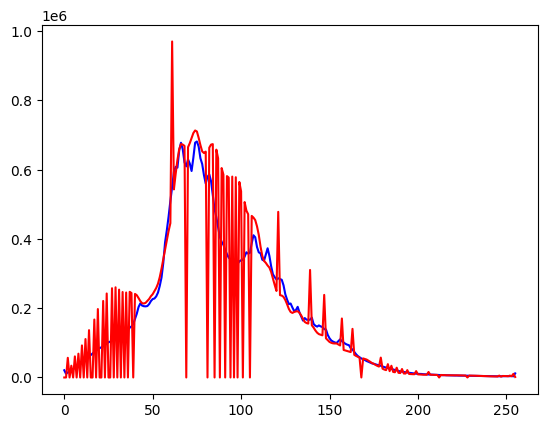

In [5]:
hist1 = cv2.calcHist([result_image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([result_image2], [0], None, [256], [0, 256])

plt.plot(hist1, color='b')
plt.plot(hist2, color='r')
plt.show()